<a href="https://colab.research.google.com/github/stefipreda/Language-Distance/blob/main/Language_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install lang2vec
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.2 MB 5.0 MB/s 


In [44]:
import lang2vec.lang2vec as l2v
import numpy as np
from numpy.linalg import norm
import networkx as nx
import string
import seaborn as sns
import pycountry

In [75]:
def normalize_language(language: str) -> str:
    try:
        lookup = pycountry.languages.lookup(language)
        try:
            return lookup.alpha_3
        except AttributeError:
            return None
    except LookupError:
        return None

In [83]:
languages_names_eu = ["Bulgarian", "Croatian", "Czech", "Danish", "Dutch", "English", "Estonian", "Finnish", "French", "German", "Greek", "Hungarian", "Irish", "Italian", "Latvian", "Lithuanian", "Maltese", "Polish", "Portuguese", "Romanian", "Slovak", "Slovenian", "Spanish", "Swedish"]

In [84]:
languages = [normalize_language(lang) for lang in languages_names_eu]

In [89]:
print(languages)

['bul', 'hrv', 'ces', 'dan', 'nld', 'eng', 'est', 'fin', 'fra', 'deu', None, 'hun', 'gle', 'ita', 'lav', 'lit', 'mlt', 'pol', 'por', 'ron', 'slk', 'slv', 'spa', 'swe']


In [90]:
languages = ['bul', 'hrv', 'ces', 'dan', 'nld', 'eng', 'est', 'fin', 'fra', 'deu', 'ell', 'hun', 'gle', 'ita', 'lav', 'lit', 'mlt', 'pol', 'por', 'ron', 'slk', 'slv', 'spa', 'swe']

Family, syntactic and phonological features

In [91]:
fam_features = l2v.get_features(languages, 'fam', header=True)

In [92]:
syntax_features = l2v.get_features(languages, 'syntax_knn', header=True)

In [93]:
phonology_features = l2v.get_features(languages, 'phonology_knn', header=True)

Distance Matrix based on each feature

In [34]:
def feature_distance(a, b):
  return 1 - np.dot(a, b)/(norm(a)*norm(b))

Phylogenetic distance matrix

In [94]:
fam_matrix = np.zeros((len(languages), len(languages)))
for i, l1 in enumerate(languages):
  for j, l2 in enumerate(languages):
    fam_matrix[i][j] = feature_distance(fam_features[l1], fam_features[l2])

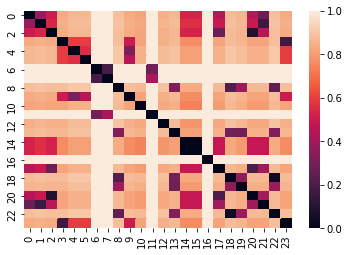

In [97]:
ax = sns.heatmap(fam_matrix)

Syntactic distance matrix

In [95]:
syntax_matrix = np.zeros((len(languages), len(languages)))
for i, l1 in enumerate(languages):
  for j, l2 in enumerate(languages):
    syntax_matrix[i][j] = feature_distance(syntax_features[l1], syntax_features[l2])

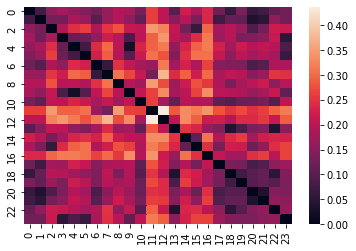

In [152]:
ax = sns.heatmap(syntax_matrix)

Phonology distance matrix

In [96]:
phonology_matrix = np.zeros((len(languages), len(languages)))
for i, l1 in enumerate(languages):
  for j, l2 in enumerate(languages):
    phonology_matrix[i][j] = feature_distance(phonology_features[l1], phonology_features[l2])

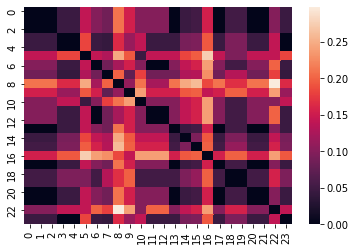

In [153]:
ax = sns.heatmap(phonology_matrix)

Visualise the languages as a graph based on distance matrix

In [154]:
def visualise_graph(dist_matrix, labels, threshold):
  G = nx.Graph()
  edge_list = [(label1, label2, 5*dist_matrix[i][j]) for i, label1 in enumerate(labels) for j, label2 in enumerate(labels) if j > i if dist_matrix[i][j] < threshold]
  G.add_weighted_edges_from(edge_list)
  print(G)
  nx.draw_networkx(G, with_labels=True)

Graph with 23 nodes and 63 edges


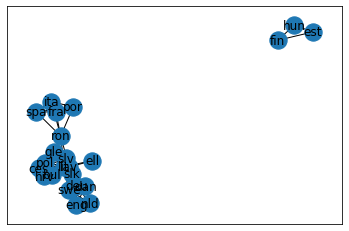

In [157]:
visualise_graph(fam_matrix, languages, threshold=0.8)

Groups identified: Uralic vs Indo-European

Graph with 21 nodes and 39 edges


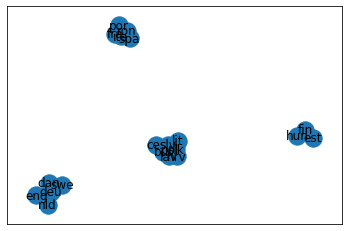

In [158]:
visualise_graph(fam_matrix, languages, threshold=0.5)

Groups identified: Germanic, Latin, Slavic (all Indo-European), Uralic

Graph with 18 nodes and 14 edges


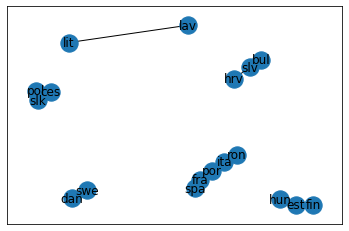

In [159]:
visualise_graph(fam_matrix, languages, threshold=0.3)

Graph with 6 nodes and 3 edges


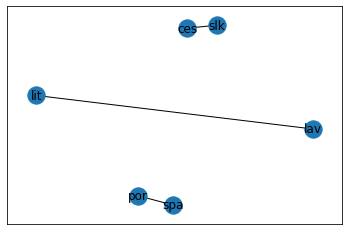

In [162]:
visualise_graph(fam_matrix, languages, threshold=0.1)

The closest pairs of languages: Spanish-Portuguese, Czech-Slovakian, Latvian-Lithuanian